In [1]:
rm(list=ls())
options(warn=-1)
require(ggplot2)
require(reshape2)

Loading required package: ggplot2
Loading required package: reshape2


# Etude d'ATM (At The Money)

In [2]:
ATM = read.table("swaphist2.csv", sep= ";", header=TRUE, stringsAsFactors=F)
ATM$Date <- as.Date( ATM$Date, '%d/%m/%Y') #Remise au format américan YYYY-MM-DD
str(ATM)

'data.frame':	741 obs. of  10 variables:
 $ Date   : Date, format: "2001-01-11" "2001-01-18" ...
 $ X1to5  : num  14.5 13.6 13.2 12.7 12.7 12.3 12.1 12.2 12.6 12.5 ...
 $ X1to10 : num  12.4 11.6 11.1 10.9 10.8 10.7 10.5 10.4 10.6 10.5 ...
 $ X1to20 : num  12.4 11.6 11.1 10.9 10.8 10.7 10.5 10.4 10.6 10.5 ...
 $ X5to5  : num  11.9 10.2 10.7 10.9 10.9 10.9 11 10.8 10.9 10.9 ...
 $ X5to10 : num  10.8 9 9.8 9.9 9.9 9.9 10 9.8 9.9 9.8 ...
 $ X5to20 : num  10.8 9 9.8 9.9 9.9 9.9 10 9.8 9.9 9.8 ...
 $ X10to5 : num  9.6 9.8 8.9 9.1 9.3 9.4 9.5 9.4 9.3 9.4 ...
 $ X10to10: num  8.8 8.9 8.1 8.1 8.3 8.2 8.3 8.1 8.2 8.2 ...
 $ X10to20: num  8.8 8.9 8.1 8.1 8.3 8.2 8.3 8.1 8.2 8.2 ...


In [3]:
analyseTable=function(table){
    sum = summary(table)
    #cat("La valeur minimale est : ", sum[1], "\n")
    #cat("La valeur maximale est : ", sum[6], "\n")
    #cat("La moyenne est : ", mean(table), "\n")
    #cat("L'estimateur sans biais de la variance est : ", var(table), "\n")
    #cat("L'ecart type est : ", sd(table), "\n")
    #cat("La mediane : ", sum[3], "\n")
    #cat("Le premier quartile : ", sum[2], "\n")
    #cat("Le troisieme quartile : ", sum[5], "\n")
    #cat("Les quantiles sont : ", "\n")
    quan = quantile(table, c(0.25, 0.5, 0.95, 0.995, 0.999))
    return (c(sum[1], sum[6], mean(table), var(table), sd(table), sum[3], sum[2], sum[5],
             quan[1], quan[2], quan[3], quan[4], quan[5]))
}

In [4]:
X1to5 = analyseTable(ATM$X1to5)
X1to10 = analyseTable(ATM$X1to10)
X1to20 = analyseTable(ATM$X1to20)
X5to5 = analyseTable(ATM$X5to5)
X5to10 = analyseTable(ATM$X5to10)
X5to20 = analyseTable(ATM$X5to20)
X10to5 = analyseTable(ATM$X10to5)
X10to10 = analyseTable(ATM$X10to10)
X10to20 = analyseTable(ATM$X10to20)

In [5]:
tabtest=data.frame(X1to5, X1to10, X1to20, X5to5, X5to10, X5to20, X10to5, X10to10, X10to20, 
                   row.names=c("Valeur_Min", "Valeur_max", "Moyenne", "Variance_Empirique", "Ecart_Type", 
                                "Mediane", "Premier_quartile", "Troisime_quartile", "Quantile_d'ordre_0.25",
                                "Quantile_d'ordre_0.5", "Quantile_d'ordre_0.95", "Quantile_d'ordre_0.99", 
                                "Quantile_d'ordre_0.995"))

In [6]:
tabtest

,X1to5,X1to10,X1to20,X5to5,X5to10,X5to20,X10to5,X10to10,X10to20
Valeur_Min,11.2,9.8,8.8,9.4,8.3,7.5,7.5,7.6,6.5
Valeur_max,283.7,103.6,87.71,109,94.63,82.4,86.77,85.97,75.5
Moyenne,33.691,25.73794,22.34049,21.88444,20.17451,19.12934,17.80067,18.01535,17.49971
Variance_Empirique,770.615,249.2404,168.0841,169.9747,134.4511,113.8348,104.2109,109.7362,97.60313
Ecart_Type,27.75995,15.78735,12.96473,13.03743,11.59531,10.66934,10.20837,10.47551,9.87943
Mediane,25,20.55,19.8,16.6,16,16.05,13.75,14.2,14.65
Premier_quartile,17.5,14.4,12.5,13,12,11.1,11,10.75,10.2
Troisime_quartile,45.43,32.9,28.3,28.32,26.05,24.4,22.4,23.15,22.1
Quantile_d'ordre_0.25,17.5,14.4,12.5,13,12,11.1,11,10.75,10.2
Quantile_d'ordre_0.5,25,20.55,19.8,16.6,16,16.05,13.75,14.2,14.65


## Comentaires sur le tableau d'étude statistique.
Les swaptions de Ténor 5 ans ont toujours la range de volatilité la plus étendue, la variance (dispersion autour de la moyenne/espérance) la plus grande, sauf pour l'expiry = 10Years. <br/>
En particulier pour le X1to5 (Expiry = 1Year, Tenor = 5Years), on voit en observant les quantiles que les valeurs très grandes sont très rares par rapport à tout l'échantillon (le quantile empirique d'ordre 0.95 est à 79.48, tandis que la valeur maximale est à 283.7). Ce n'est pas du tout le cas pour les autres swaptions. 

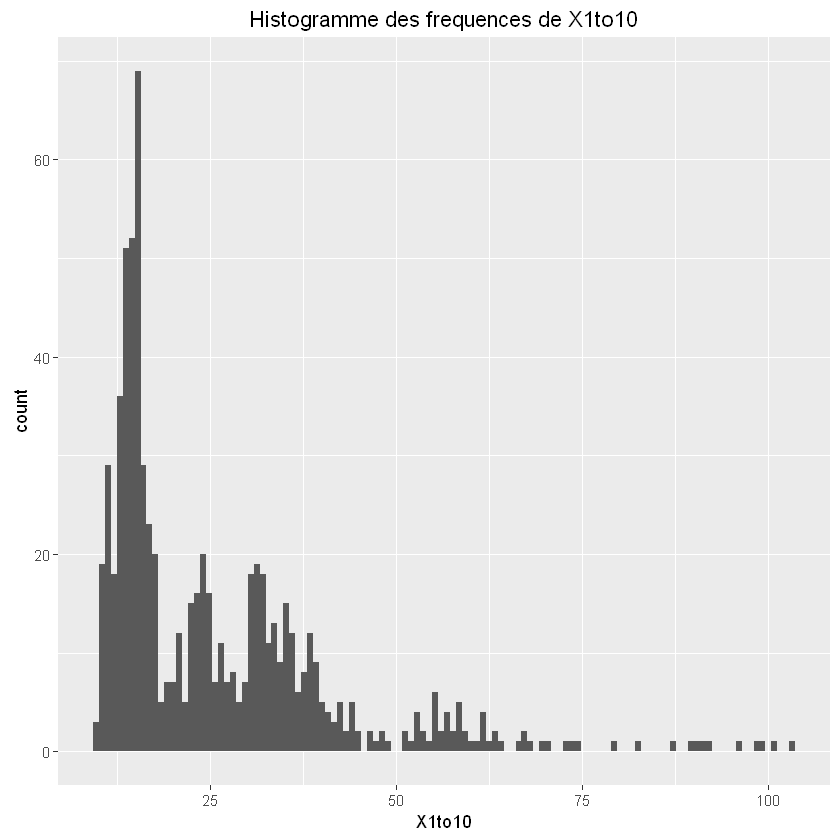

In [7]:
ggplot(ATM, aes(X1to10)) +
geom_histogram(binwidth = 0.8) +
ggtitle("Histogramme des frequences de X1to10")

### Est ce que X1to10 suit une loi particulière ?
On teste plusieurs types de loi : <strong>normale</strong>, <strong>exponentielle</strong>, <strong>khi2 à 1 et 2 degrés de libertés</strong>.</br>
On est toujours contraint de rejeter l'hypothèse que X1to10 suit une loi particulière.<br/>
Cette conclusion est conservée pour tous les autres swaptions.<br/>

In [8]:
shapiro.test(ATM$X1to10)
ks.test(ATM$X1to10, "pexp")
ks.test(ATM$X1to10, "pchisq", df=1)


	Shapiro-Wilk normality test

data:  ATM$X1to10
W = 0.80444, p-value < 2.2e-16



	One-sample Kolmogorov-Smirnov test

data:  ATM$X1to10
D = 0.99994, p-value < 2.2e-16
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  ATM$X1to10
D = 0.99825, p-value < 2.2e-16
alternative hypothesis: two-sided


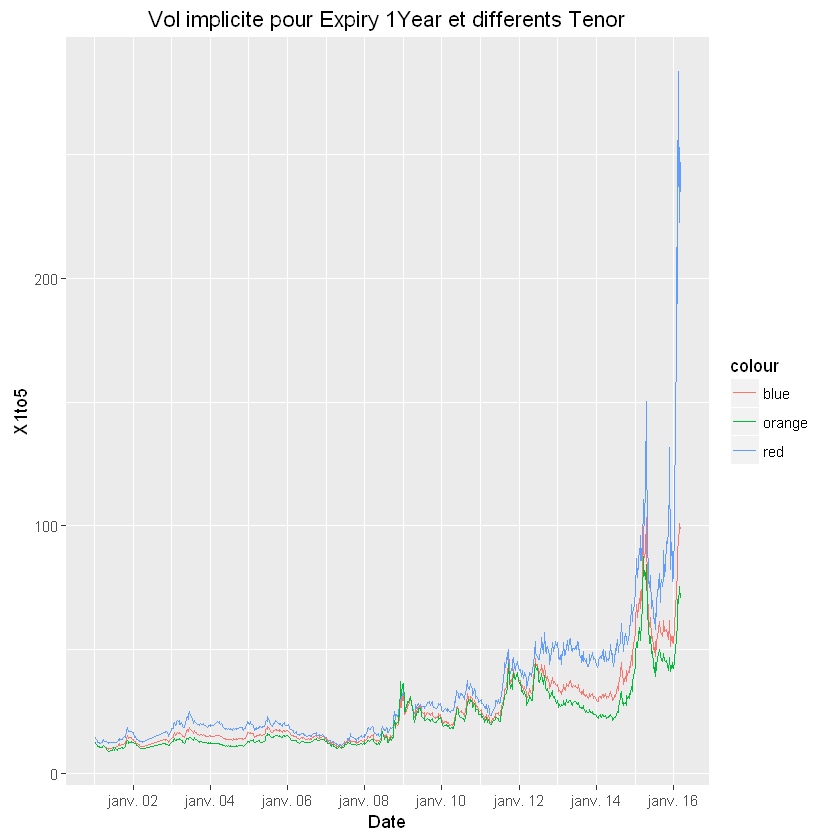

In [9]:
ggplot( data = ATM, aes( x = Date )) +
geom_line(aes(y = X1to5, colour = "red")) + 
geom_line(aes(y = X1to10, colour = "blue")) + 
geom_line(aes(y = X1to20, colour = "orange")) +
scale_x_date(date_labels = "%b %y") +
ggtitle("Vol implicite pour Expiry 1Year et differents Tenor")

## Commentaires sur Expiry = 1Year
Les volatilités implicitent évoluent de la même manière. Celle de ténor le plus petit (5 ans) reste la plus volatile.<br/>
Les volatilités prennent des valeurs très grande à partir de <strong>Septembre 2014</strong>.<br/>
Elles restent en revanche assez stable depuis le début des mesures jusqu'à <strong>Septembre 2008</strong>.</br>
Cela suggère de séparer l'étude sur <strong>trois périodes/trois régimes différents</strong> :
- de 2001 à Août 2008
- de Septembre 2008 à Août 2014
- de Septembre 2014 à aujourd'hui.

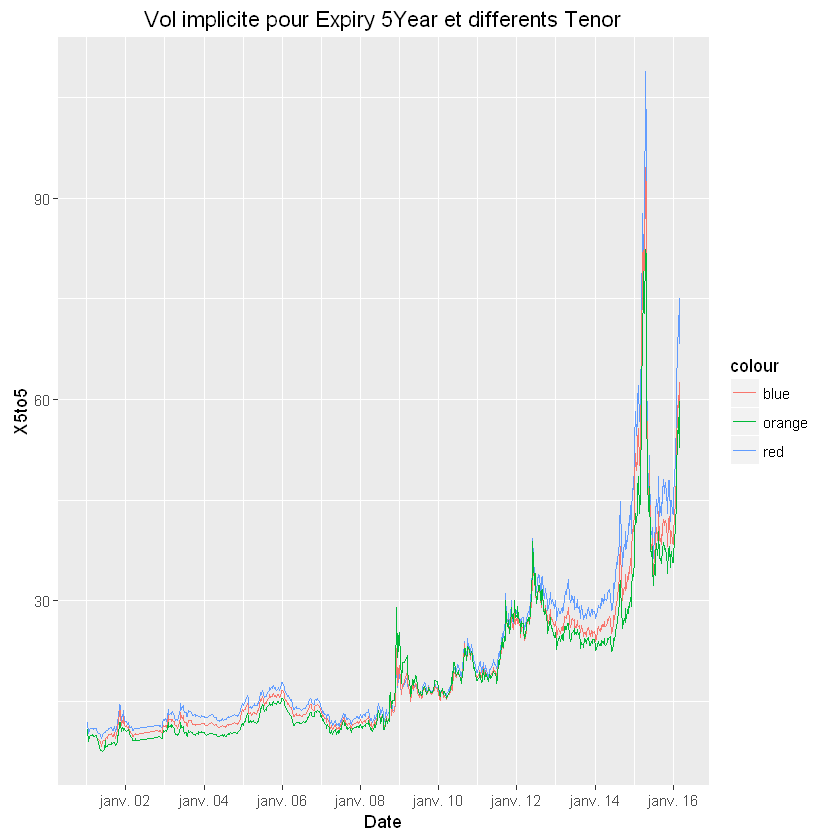

In [10]:
ggplot( data = ATM, aes( x = Date )) +
geom_line(aes(y = X5to5, colour = "red")) + 
geom_line(aes(y = X5to10, colour = "blue")) + 
geom_line(aes(y = X5to20, colour = "orange")) +
scale_x_date(date_labels = "%b %y") +
ggtitle("Vol implicite pour Expiry 5Year et differents Tenor")

## Commentaires sur Expiry = 5Years
On peut encore distinguer ces 3 parties temporelles.<br/>
L'évolution des volatilités est beaucoup plus synchrone. <br/>
Il paraît évident que les volatilités à même expiry sont dépendantes. On le vérifiera par la suite en faisant des test de Khi2.

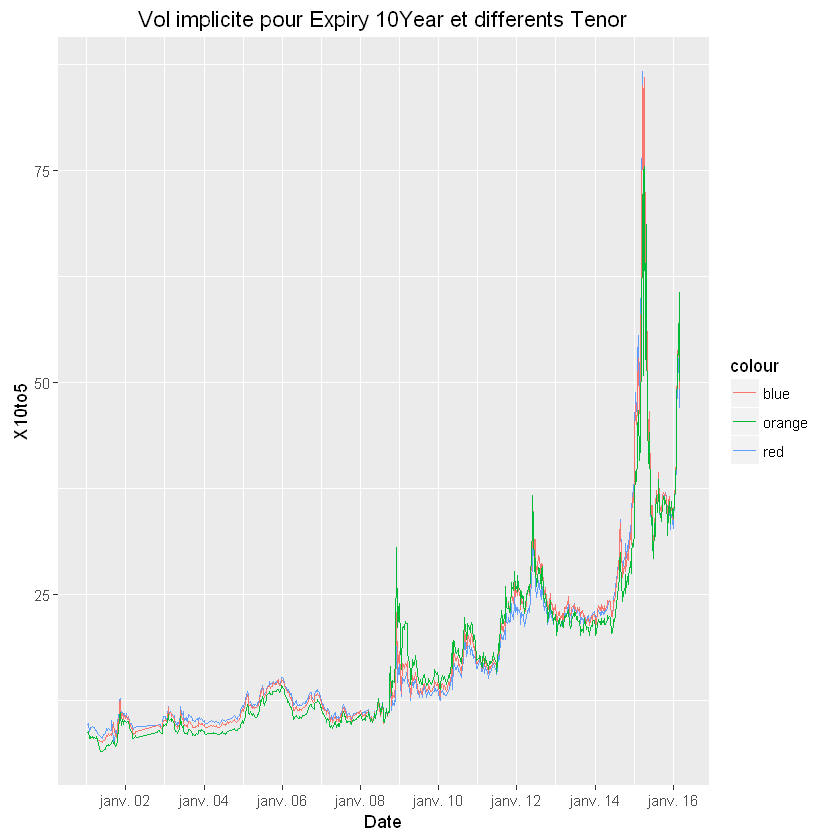

In [11]:
ggplot( data = ATM, aes( x = Date )) +
geom_line(aes(y = X10to5, colour = "red")) + 
geom_line(aes(y = X10to10, colour = "blue")) + 
geom_line(aes(y = X10to20, colour = "orange")) +
scale_x_date(date_labels = "%b %y") +
ggtitle("Vol implicite pour Expiry 10Year et differents Tenor")

## Commentaires sur Expiry = 10Years
L'évolution semble encore plus synchrone entre les différents ténors.<br/>
On oberserve deux pics importants (le premie nous avait notamment aidé à déterminer la première période de temps) : en Décembre 2008 et Juin 2012. Ceci peuvent probablement être inputés aux débuts de la crise financière de 2008 et les répercusions de la crise de la dette grecque.

In [12]:
ATM$Date[349] #La date a le format YYYY-MM-DD
ATM$Date[662]

[1] "2008-08-28"

[1] "2014-08-28"

# Etude de l'ATM sur différentes périodes

In [13]:
ATMPart1 = ATM[1:349,]
ATMPart2 = ATM[350:662,]
ATMPart3 = ATM[663:nrow(ATM),]

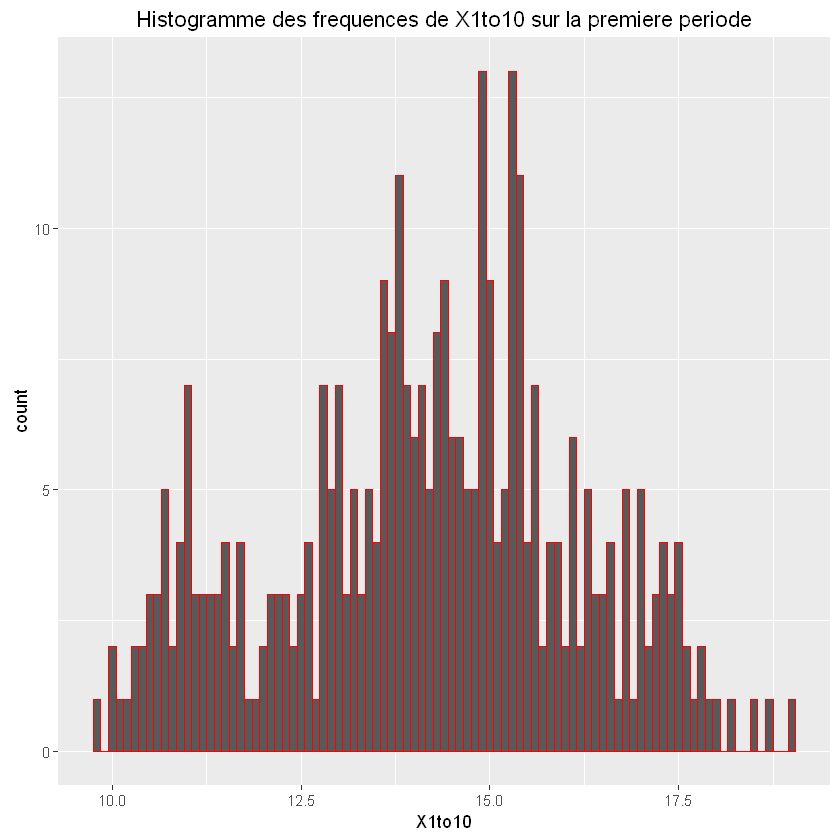

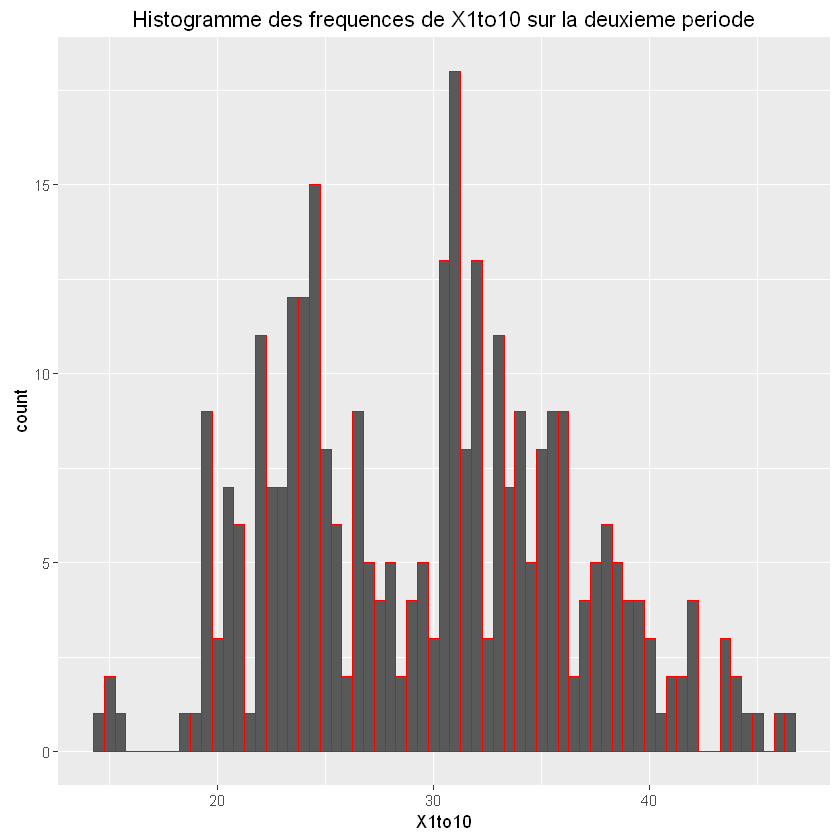

In [14]:
ggplot(ATMPart1, aes(X1to10)) +
geom_histogram(binwidth = 0.1, color="red") +
ggtitle("Histogramme des frequences de X1to10 sur la premiere periode")
ggplot(ATMPart2, aes(X1to10)) +
geom_histogram(binwidth = 0.5, color="red") +
ggtitle("Histogramme des frequences de X1to10 sur la deuxieme periode")

### Encore une fois, aucune loi ne paraît évidente pour aucun des swaptions.

In [15]:
ks.test(ATM$X10to5 , ATM$X10to10)


	Two-sample Kolmogorov-Smirnov test

data:  ATM$X10to5 and ATM$X10to10
D = 0.070175, p-value = 0.05203
alternative hypothesis: two-sided


# Etude des Incréments
On étudie les incréments observés entre chaque période de temps, c'est à dire <i>Vol(t+1) - Vol(t)</i>.

In [16]:
INC = read.table("Incr.csv", sep= ";", header=TRUE, stringsAsFactors=F)
INC$Date <- as.Date( INC$Date, '%d/%m/%Y')
str(INC)

'data.frame':	740 obs. of  10 variables:
 $ Date  : Date, format: "2001-01-18" "2001-01-25" ...
 $ E1T5  : num  -0.9 -0.4 -0.5 0 -0.4 ...
 $ E1T10 : num  -0.8 -0.5 -0.2 -0.1 -0.1 ...
 $ E1T20 : num  -0.8 -0.5 -0.2 -0.1 -0.1 ...
 $ E5T5  : num  -1.7 0.5 0.2 0 0 ...
 $ E5T10 : num  -1.8 0.8 0.1 0 0 ...
 $ E5T20 : num  -1.8 0.8 0.1 0 0 ...
 $ E10T5 : num  0.2 -0.9 0.2 0.2 0.1 ...
 $ E10T10: num  0.1 -0.8 0 0.2 -0.1 ...
 $ E10T20: num  0.1 -0.8 0 0.2 -0.1 ...


In [17]:
E1T5 = analyseTable(INC$E1T5)
E1T10 = analyseTable(INC$E1T10)
E1T20 = analyseTable(INC$E1T20)
E5T5 = analyseTable(INC$E5T5)
E5T10 = analyseTable(INC$E5T10)
E5T20 = analyseTable(INC$E5T20)
E10T5 = analyseTable(INC$E10T5)
E10T10 = analyseTable(INC$E10T10)
E10T20 = analyseTable(INC$E10T20)
tabRecap=data.frame(E1T5, E1T10, E1T20, E5T5, E5T10, E5T20, E10T5, E10T10, E10T20, 
                   row.names=c("Valeur_Min", "Valeur_max", "Moyenne", "Variance_Empirique", "Ecart_Type", 
                                "Mediane", "Premier_quartile", "Troisime_quartile", "Quantile_d'ordre_0.25",
                                "Quantile_d'ordre_0.5", "Quantile_d'ordre_0.95", "Quantile_d'ordre_0.99", 
                                "Quantile_d'ordre_0.995"))
tabRecap

,E1T5,E1T10,E1T20,E5T5,E5T10,E5T20,E10T5,E10T10,E10T20
Valeur_Min,-66.07,-21.45,-16.66,-29.01,-25.82,-21.4,-30.48,-31.66,-24.3
Valeur_max,94.04,20.45,17.23,23.97,17.23,14.1,32.67,33.17,24.6
Moyenne,0.3140676,0.1163108,0.07864865,0.07610811,0.06183784,0.05658108,0.05052703,0.05462162,0.05586486
Variance_Empirique,52.53274,4.896513,3.60581,5.058303,3.666593,3.051621,6.193764,6.49863,5.30408
Ecart_Type,7.247947,2.212807,1.898897,2.249067,1.914835,1.746889,2.488727,2.549241,2.303059
Mediane,0,0,0,0.05,0,0,0,0,0
Premier_quartile,-0.65,-0.4,-0.4,-0.35,-0.35,-0.35,-0.3,-0.3,-0.3
Troisime_quartile,0.8,0.5,0.4,0.4,0.4,0.4,0.35,0.4,0.4
Quantile_d'ordre_0.25,-0.65,-0.4,-0.4,-0.35,-0.35,-0.35,-0.3,-0.3,-0.3
Quantile_d'ordre_0.5,0,0,0,0.05,0,0,0,0,0


## Commentaires sur le tableau
Les swaptions d'expiry 1 Year ont une volatilité tendanciellement plus forte. Particulièrement sur E1T5, les fortes volatilités sont rares : le quantile d'ordre 0.99 est très grand, par rapport à celui de  niveau 0.95.

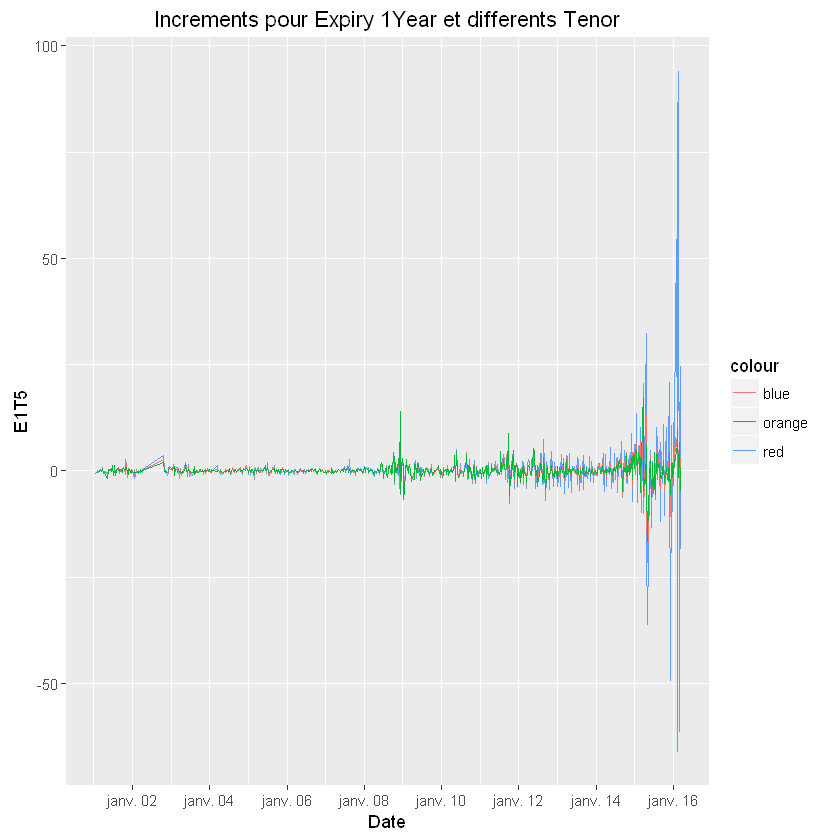

In [18]:
ggplot( data = INC, aes( x = Date )) +
geom_line(aes(y = E1T5, colour = "red")) + 
geom_line(aes(y = E1T10, colour = "blue")) + 
geom_line(aes(y = E1T20, colour = "orange")) +
scale_x_date(date_labels = "%b %y") +
ggtitle("Increments pour Expiry 1Year et differents Tenor")

In [19]:
ks.test(INC$E1T5, INC$E1T10)
ks.test(INC$E1T5,INC$E1T20)
ks.test(INC$E1T5,INC$E10T5)


	Two-sample Kolmogorov-Smirnov test

data:  INC$E1T5 and INC$E1T10
D = 0.072973, p-value = 0.03888
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  INC$E1T5 and INC$E1T20
D = 0.094595, p-value = 0.002663
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  INC$E1T5 and INC$E10T5
D = 0.14054, p-value = 8.98e-07
alternative hypothesis: two-sided


## Les incréments suivent-ils la même loi ?
Les p-valeurs des tests sont toutes largement inférieures au niveau 0.05, on rejette donc toujours l'hypothèse selon laquelle les incréments suivent la même loi. 

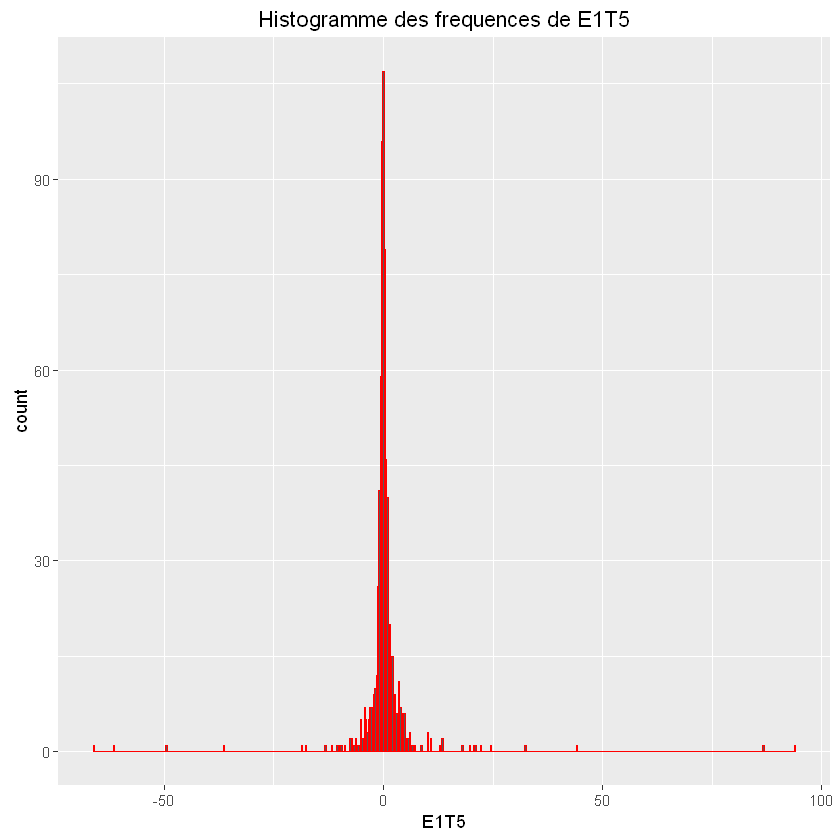

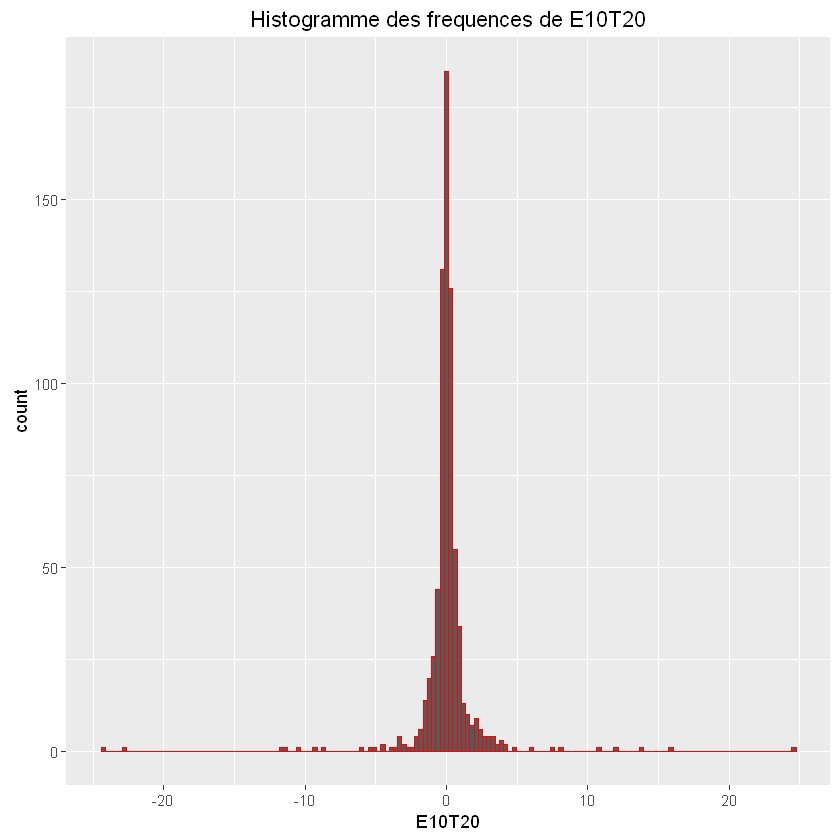

In [20]:
ggplot(INC, aes(E1T5)) +
geom_histogram(binwidth = 0.3, color="red") +
ggtitle("Histogramme des frequences de E1T5")
ggplot(INC, aes(E10T20)) +
geom_histogram(binwidth = 0.3, color="red") +
ggtitle("Histogramme des frequences de E10T20")

## Commentaires sur les histogrammes
Les histogrammes confirment un résultat vu sur le tableau récapitulatif : les incréments sont <strong>très peu dispersés autour de leur moyenne</strong> (proche de 0).<br/>
On peut se demander s'ils suivent une loi normale (qui à priori est très piquée.

In [21]:
p_val = 0
for (p in 2:10){
   p_val[p] = (shapiro.test(INC[,p]))$p.value
}
p_val

[1] 0.000000e+00 9.004747e-45 8.522021e-35 8.358739e-34 1.613613e-40
 [6] 7.046200e-40 1.610824e-37 3.306547e-44 5.474123e-44 1.850015e-41

## Les incréments suivent-ils une loi normale ?
Non, les test nous conduisent tous à rejetter fortement l'hypothèse nulle selon laquelle les incréments suivent une loi normale.

In [22]:
INC$Date[679]

[1] "2015-01-01"

## Que se passe-t-il sur une sous période ?
On observe un comportement ératique à partir de <strong>Janvier 2015</strong>. On étudie partiellement le comportement des incréments avant cette date. 

In [23]:
INCPart = INC[1:679,]
ks.test(INCPart$E1T5,INCPart$E1T10)
ks.test(INCPart$E1T10,INCPart$E1T20)
ks.test(INCPart$E1T5,INCPart$E1T20)


	Two-sample Kolmogorov-Smirnov test

data:  INCPart$E1T5 and INCPart$E1T10
D = 0.072165, p-value = 0.05825
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  INCPart$E1T10 and INCPart$E1T20
D = 0.035346, p-value = 0.79
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  INCPart$E1T5 and INCPart$E1T20
D = 0.094256, p-value = 0.004799
alternative hypothesis: two-sided


## Commentaires
Les test nous conduisent à rejetter l'hypothèse que les incréments ont une loi différente. Par exemple, on accepte l'hypothèse nulle que E1T20 et E1T10 suivent la même loi.

# Etudes des variations relatives
Jusque là, nous traitions les données de manière brutes : on ne renormalisait pas (par exemple par la première valeur pour tout ramener à 1, et étudier des variations relatives).<br/>
Néanmoins, comme dans certains modèles (par exemple dans Black-Scholes, la dynamique du prix de l'actif sous-jacent est donnée par $\frac{d S_t}{S_t}$). On s'attache donc maintenant à explorer les variations relatives.

In [24]:
var = read.table("var_relatives.csv", sep= ";", header=TRUE, stringsAsFactors=F)
var$Date <- as.Date( var$Date, '%d/%m/%Y')
str(var)

'data.frame':	740 obs. of  10 variables:
 $ Date  : Date, format: "0001-01-18" "0001-01-25" ...
 $ E1T5  : num  -0.0621 -0.0294 -0.0379 0 -0.0315 ...
 $ E1T10 : num  -0.06452 -0.0431 -0.01802 -0.00917 -0.00926 ...
 $ E1T20 : num  -0.06452 -0.0431 -0.01802 -0.00917 -0.00926 ...
 $ E5T5  : num  -0.1429 0.049 0.0187 0 0 ...
 $ E5T10 : num  -0.1667 0.0889 0.0102 0 0 ...
 $ E5T20 : num  -0.1667 0.0889 0.0102 0 0 ...
 $ E10T5 : num  0.0208 -0.0918 0.0225 0.022 0.0108 ...
 $ E10T10: num  0.0114 -0.0899 0 0.0247 -0.012 ...
 $ E10T20: num  0.0114 -0.0899 0 0.0247 -0.012 ...


In [25]:
E1T5vr = analyseTable(var$E1T5)
E1T10vr = analyseTable(var$E1T10)
E1T20vr = analyseTable(var$E1T20)
E5T5vr = analyseTable(var$E5T5)
E5T10vr = analyseTable(var$E5T10)
E5T20vr = analyseTable(var$E5T20)
E10T5vr = analyseTable(var$E10T5)
E10T10vr = analyseTable(var$E10T10)
E10T20vr = analyseTable(var$E10T20)
tabRecapVarRelative=data.frame(E1T5vr, E1T10vr, E1T20vr, E5T5vr, E5T10vr, E5T20vr, E10T5vr, E10T10vr, E10T20vr, 
                   row.names=c("Valeur_Min", "Valeur_max", "Moyenne", "Variance_Empirique", "Ecart_Type", 
                                "Mediane", "Premier_quartile", "Troisime_quartile", "Quantile_d'ordre_0.25",
                                "Quantile_d'ordre_0.5", "Quantile_d'ordre_0.95", "Quantile_d'ordre_0.99", 
                                "Quantile_d'ordre_0.995"))
tabRecapVarRelative

,E1T5vr,E1T10vr,E1T20vr,E5T5vr,E5T10vr,E5T20vr,E10T5vr,E10T10vr,E10T20vr
Valeur_Min,-0.3743,-0.2235,-0.2026,-0.2964,-0.285,-0.2632,-0.3703,-0.3749,-0.3231
Valeur_max,0.6317,0.465,0.6,0.4399,0.5267,0.6241,0.6304,0.6284,0.6514
Moyenne,0.006195196,0.004107631,0.003856004,0.003626367,0.003534033,0.003620524,0.004033539,0.004233862,0.004379747
Variance_Empirique,0.005044038,0.002723637,0.003208202,0.002555487,0.002661109,0.003104758,0.003998921,0.004024374,0.004260808
Ecart_Type,0.07102139,0.05218847,0.05664099,0.05055183,0.05158594,0.05572036,0.06323702,0.06343795,0.06527486
Mediane,0,0,0,0.002963,0,0,0,0,0
Premier_quartile,-0.0262,-0.02224,-0.02264,-0.01958,-0.02063,-0.02047,-0.01931,-0.02185,-0.02152
Troisime_quartile,0.03318,0.02492,0.02372,0.0248,0.02486,0.02537,0.02375,0.02624,0.02675
Quantile_d'ordre_0.25,-0.02619675,-0.02223992,-0.0226394,-0.01957801,-0.02062616,-0.02047347,-0.01930833,-0.02184771,-0.02151696
Quantile_d'ordre_0.5,0,0,0,0.002963021,0,0,0,0,0


## Commentaires
Les valeurs sont toujours bien réparties autour de la moyenne à 0, comme on le voit dans les quartiles. La variance empirique est très faible ce qui indique une très faible dispersion des valeurs autour de la moyenne. On observe toutefois une anomalie dans le dernier centile, les valeurs s'envolent.

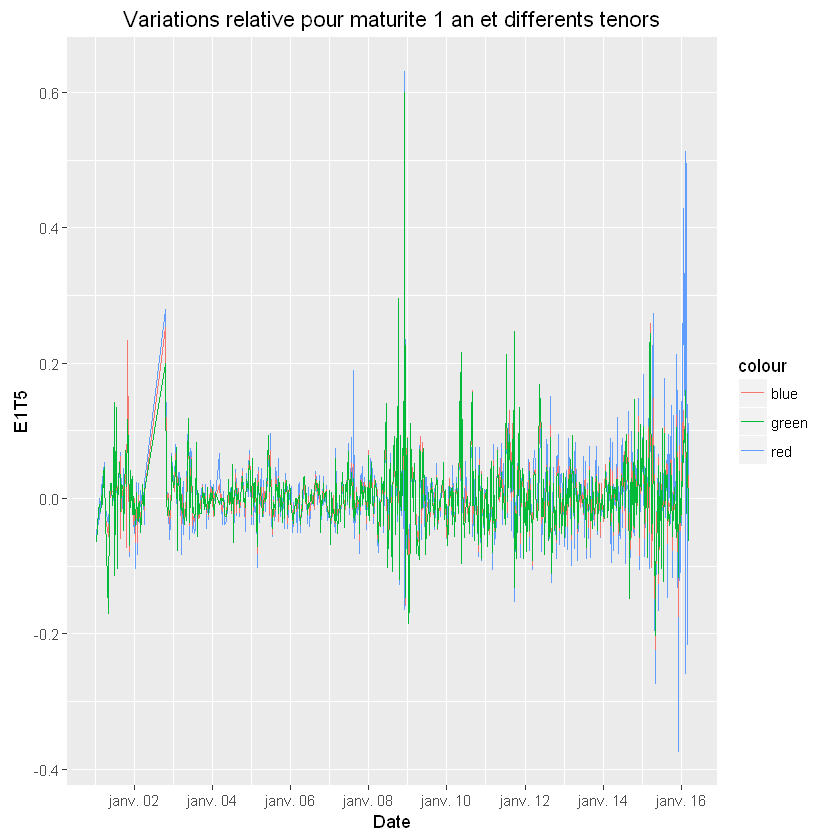

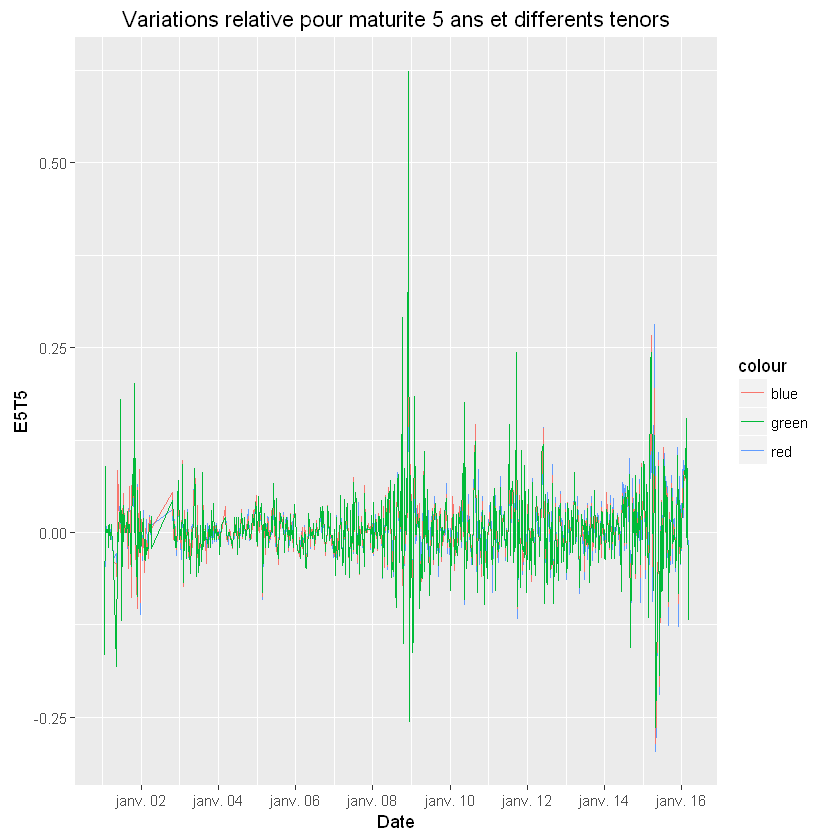

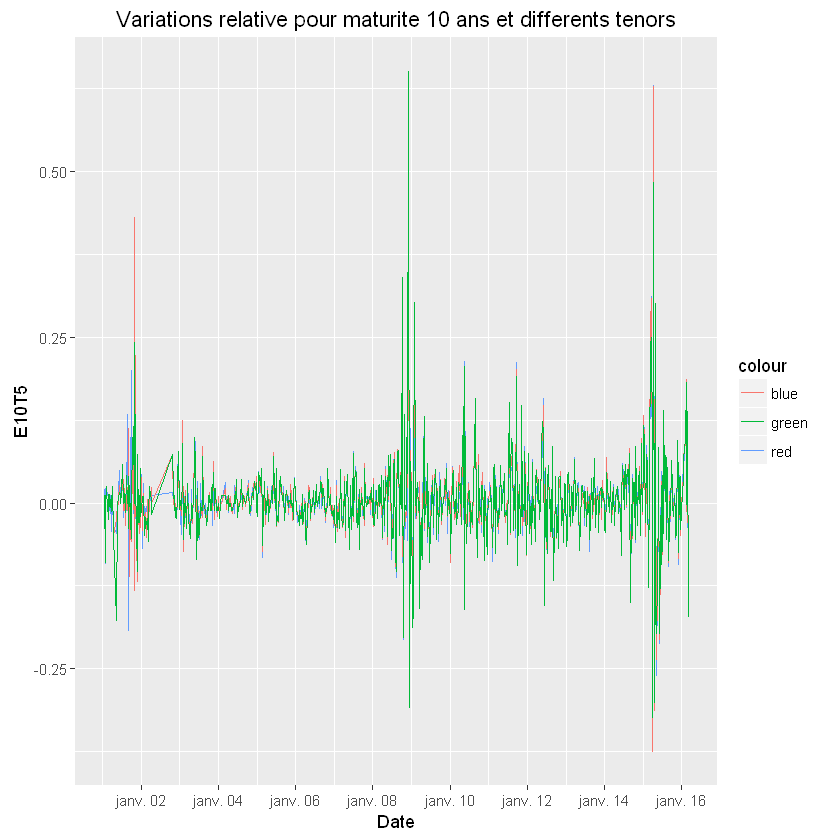

In [26]:
ggplot( data = var, aes( x = Date)) + 
geom_line(aes(y =  E1T5, colour = "red")) +  
geom_line(aes(y =  E1T10, colour = "blue")) +
geom_line(aes(y =  E1T20, colour = "green")) + 
scale_x_date(date_labels = "%b %y") + 
ggtitle("Variations relative pour maturite 1 an et differents tenors")

ggplot( data = var, aes( x = Date)) + 
geom_line(aes(y =  E5T5, colour = "red")) + 
geom_line(aes(y =  E5T10, colour = "blue")) + 
geom_line(aes(y =  E5T20, colour = "green")) + 
scale_x_date(date_labels = "%b %y") + 
ggtitle("Variations relative pour maturite 5 ans et differents tenors")

ggplot( data = var, aes( x = Date)) + 
geom_line(aes(y =  E10T5, colour = "red")) + 
geom_line(aes(y =  E10T10, colour = "blue")) + 
geom_line(aes(y =  E10T20, colour = "green")) + 
scale_x_date(date_labels = "%b %y") + 
ggtitle("Variations relative pour maturite 10 ans et differents tenors")

## Commentaires
Le mouvement est chaotique et très dense. La variation relative peut atteindre deux valeurs extrèmes en très peu de périodes de temps. Le mouvement est beaucoup plus chaotique que lorsque l'on regardait les variations absolues et l'agitation n'est plus seulement concentrée vers la fin des mesures (i.e. à partir de janvier 2015). Cela peut mettre en doute la pertinence de la segmentation en 3 périodes de temps (2001 à 2008, 2008 à 2015 et 2015 à 2016). La suite peut en partie permettre de répondre à cette interrogation. 

In [30]:
ks.test(var$E1T5, var$E1T10)
ks.test(var$E1T5, var$E1T20)
ks.test(var$E1T10, var$E1T20)
ks.test(var$E10T5, var$E10T20)


	Two-sample Kolmogorov-Smirnov test

data:  var$E1T5 and var$E1T10
D = 0.062162, p-value = 0.1146
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  var$E1T5 and var$E1T20
D = 0.068919, p-value = 0.0595
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  var$E1T10 and var$E1T20
D = 0.025676, p-value = 0.9677
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  var$E10T5 and var$E10T20
D = 0.037838, p-value = 0.6646
alternative hypothesis: two-sided


## La même loi
Les p-valeurs des tests sont toutes largement supérieures à 0.05, on accepte donc l'hypothèse selon laquelle les variations relatives des volatilités suivent la même loi. On teste ci-dessus quelques couples de données. <br/>
On verra par la suite, si cette loi est une loi classique (normale, khi_2, exponentielle).


	Shapiro-Wilk normality test

data:  var$E1T5
W = 0.82068, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  var$E10T10
W = 0.75963, p-value < 2.2e-16


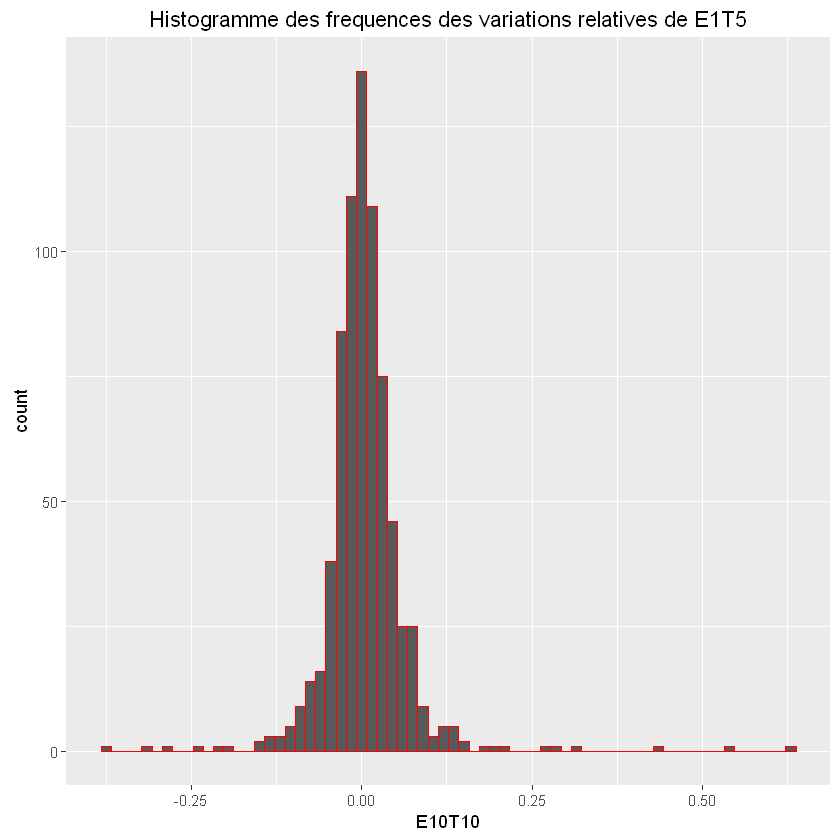

In [34]:
ggplot(var, aes(E10T10)) +
geom_histogram(binwidth = 0.015, color="red") +
ggtitle("Histogramme des frequences des variations relatives de E1T5")

shapiro.test(var$E1T5)
shapiro.test(var$E10T10)

## Test de Normalité de Shapiro
Le tracé des histogrammes suggère que les variations relatives suivent une loi normale, néanmoins le test de normalité de Shapiro nous conduit à rejeter cette hypohtèse nulle (de loi normale, donc log-normale pour les volatilités implicites).<br/>
On observe néanmoins sur le graphe que les fréquences ne sont pas tout à fait symétrique par rapport à la moyenne, avec en général une asyémtrie en faveur des valeurs en dessous de la moyenne. 

# Etude sur la période de temps 2003-2007
C'est la période où les variations relatives sont en moyenne les plus faibles. On se concentre ci-après sur cette période de temps.

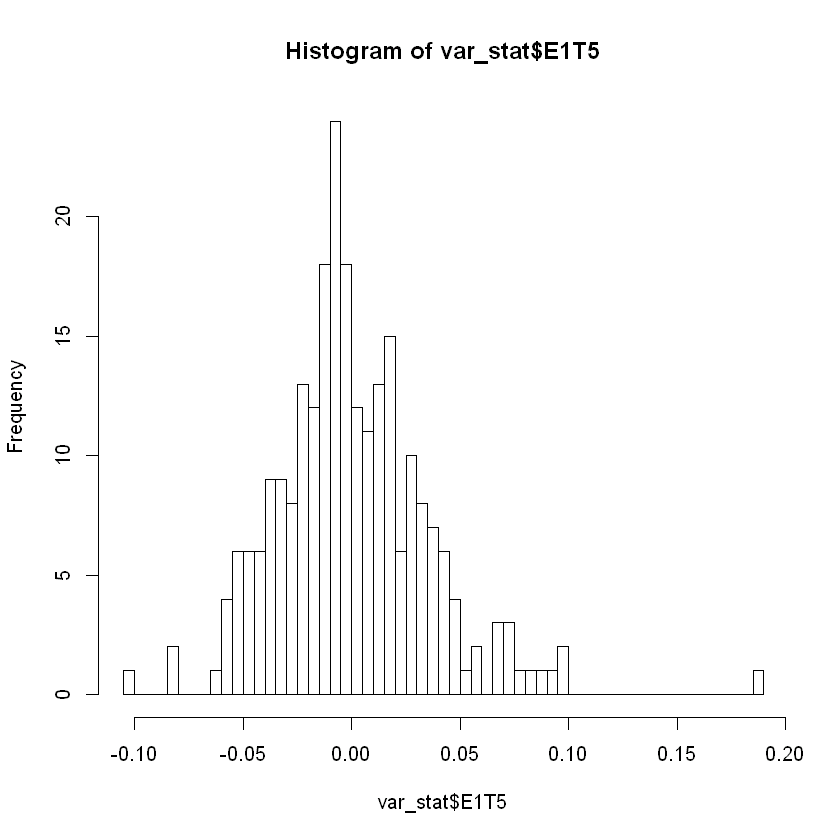

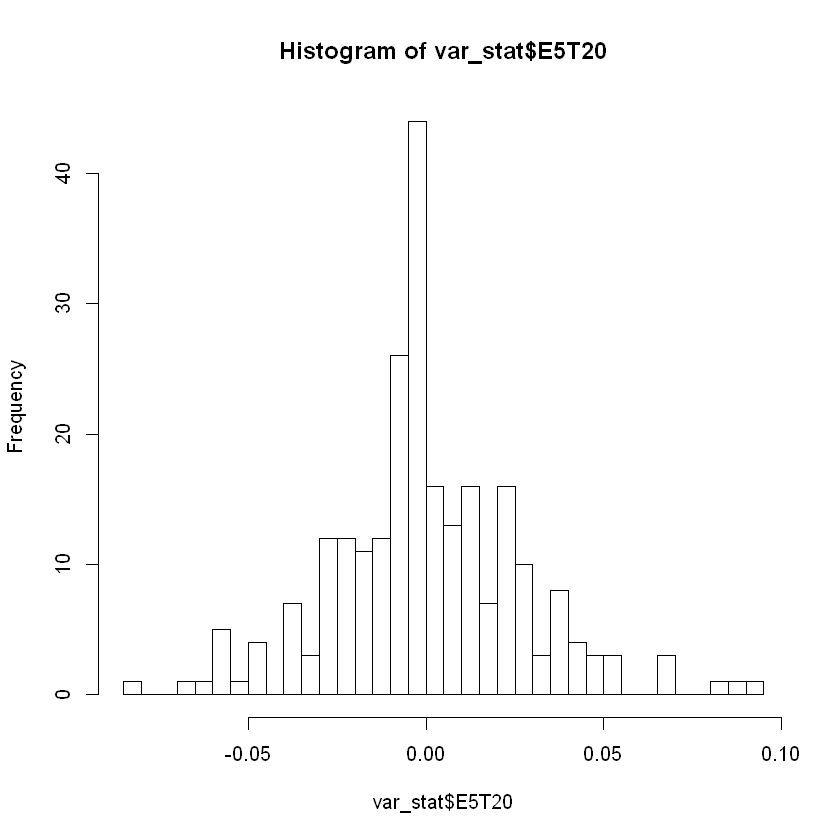

In [51]:
var_stat = var[70:314,]
hist(var_stat$E1T5, nclass = 50)
hist(var_stat$E5T20, nclass = 50)

## Commentaires
Les test de normalité de Shapiro nous conduisent une fois de plus à rejeter l'hypohtèse de normalité sur la sous période qui s'étend de 2003 à 2007 (période où les incréments relatifs sont en moyenne les plus faibles).

## Etude sur la période de temps 2001 - Août 2008

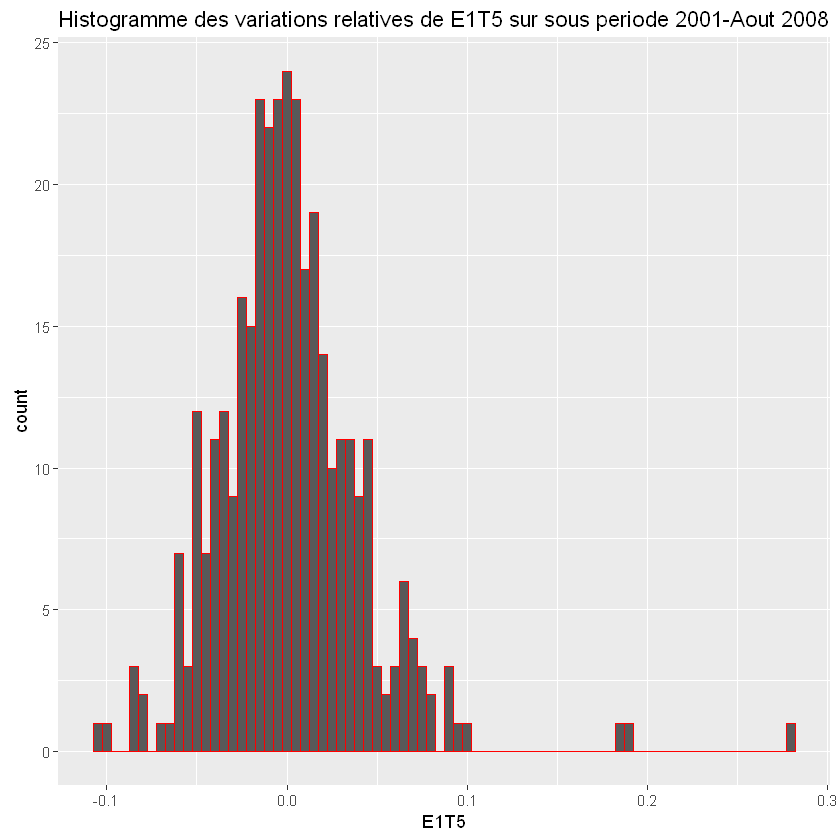

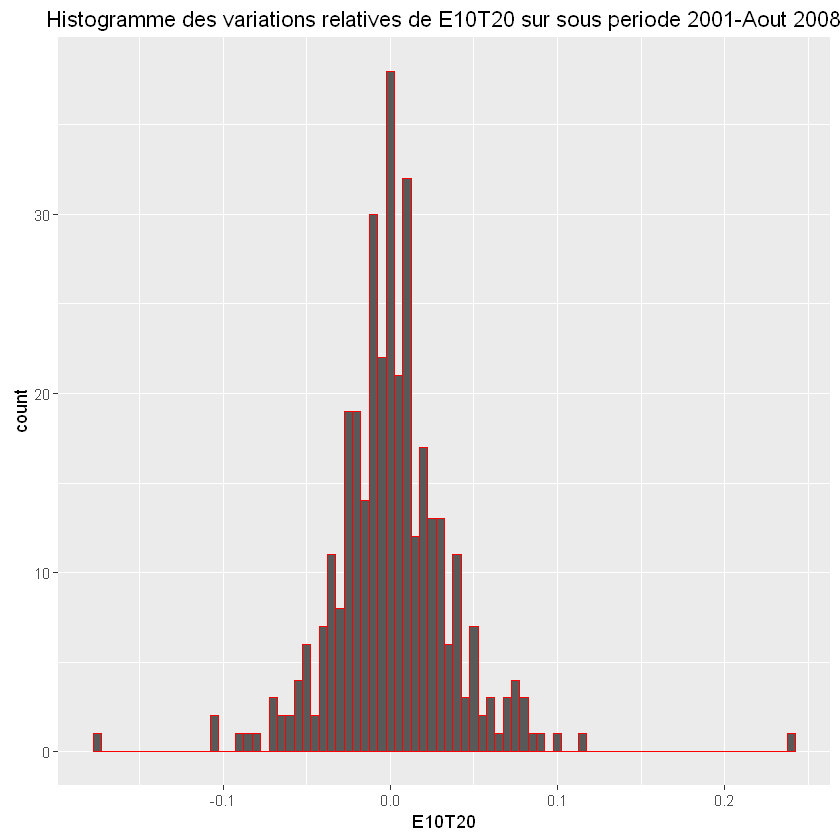

In [54]:
varPart1 = var[1:349,]

ggplot(varPart1, aes(E1T5)) +
geom_histogram(binwidth = 0.005, color="red") +
ggtitle("Histogramme des variations relatives de E1T5 sur sous periode 2001-Aout 2008")

ggplot(varPart1, aes(E10T20)) +
geom_histogram(binwidth = 0.005, color="red") +
ggtitle("Histogramme des variations relatives de E10T20 sur sous periode 2001-Aout 2008")

In [65]:
E1T5vr1 = analyseTable(varPart1$E1T5)
E1T10vr1 = analyseTable(varPart1$E1T10)
E1T20vr1 = analyseTable(varPart1$E1T20)
E5T5vr1 = analyseTable(varPart1$E5T5)
E5T10vr1 = analyseTable(varPart1$E5T10)
E5T20vr1 = analyseTable(varPart1$E5T20)
E10T5vr1 = analyseTable(varPart1$E10T5)
E10T10vr1 = analyseTable(varPart1$E10T10)
E10T20vr1 = analyseTable(varPart1$E10T20)
tabRecapVarRelativePart1=data.frame(E1T5vr1, E1T10vr1, E1T20vr1, E5T5vr1, E5T10vr1, E5T20vr1, E10T5vr1, E10T10vr1, E10T20vr1, 
                   row.names=c("Valeur_Min", "Valeur_max", "Moyenne", "Variance_Empirique", "Ecart_Type", 
                                "Mediane", "Premier_quartile", "Troisime_quartile", "Quantile_d'ordre_0.25",
                                "Quantile_d'ordre_0.5", "Quantile_d'ordre_0.95", "Quantile_d'ordre_0.99", 
                                "Quantile_d'ordre_0.995"))
tabRecapVarRelativePart1

,E1T5vr1,E1T10vr1,E1T20vr1,E5T5vr1,E5T10vr1,E5T20vr1,E10T5vr1,E10T10vr1,E10T20vr1
Valeur_Min,-0.1037,-0.0871,-0.1698,-0.1429,-0.1667,-0.1809,-0.1915,-0.1313,-0.1772
Valeur_max,0.2791,0.2523,0.2,0.1694,0.181,0.202,0.3956,0.4302,0.2414
Moyenne,0.001499097,0.00115037,0.001086591,0.0008394498,0.0009575233,0.001002508,0.00127044,0.001467268,0.001365047
Variance_Empirique,0.00164664,0.001223052,0.001396913,0.00099934,0.001149403,0.001309809,0.001748703,0.001668042,0.001287684
Ecart_Type,0.04057882,0.03497216,0.0373753,0.03161234,0.03390285,0.03619129,0.0418175,0.04084167,0.03588431
Mediane,0,0,0,0,0,0,0,0,0
Premier_quartile,-0.02186,-0.01948,-0.0186,-0.0155,-0.01613,-0.01786,-0.01802,-0.01754,-0.01796
Troisime_quartile,0.02089,0.0176,0.01835,0.0165,0.01645,0.01852,0.01786,0.01626,0.01887
Quantile_d'ordre_0.25,-0.02185792,-0.01948052,-0.01860465,-0.01550388,-0.01612903,-0.01785714,-0.01801802,-0.01754386,-0.01796407
Quantile_d'ordre_0.5,0,0,0,0,0,0,0,0,0


### Commentaires

Les médianes sont toutes nulles, les variations relatives sont équiréparties autour de 0.<br/>
De plus, la variance empirique est très faible, bien plus faible que sur toute la durée de mesure (2001-2016). Par exemple, pour E1T5, elle passe de 0.17 à 0.0016, donc divisée par 100. <br/>
La moyenne indique bien qu'en moyenne, on observe pas vraiment de mouvements des volatilités implicites. Elles restent autour de la valeur moyenne de volatilité. Les valeurs min et max confirment ce caractère "stationnaire".

## Etude sur la sous période Sept2008-Aout2012

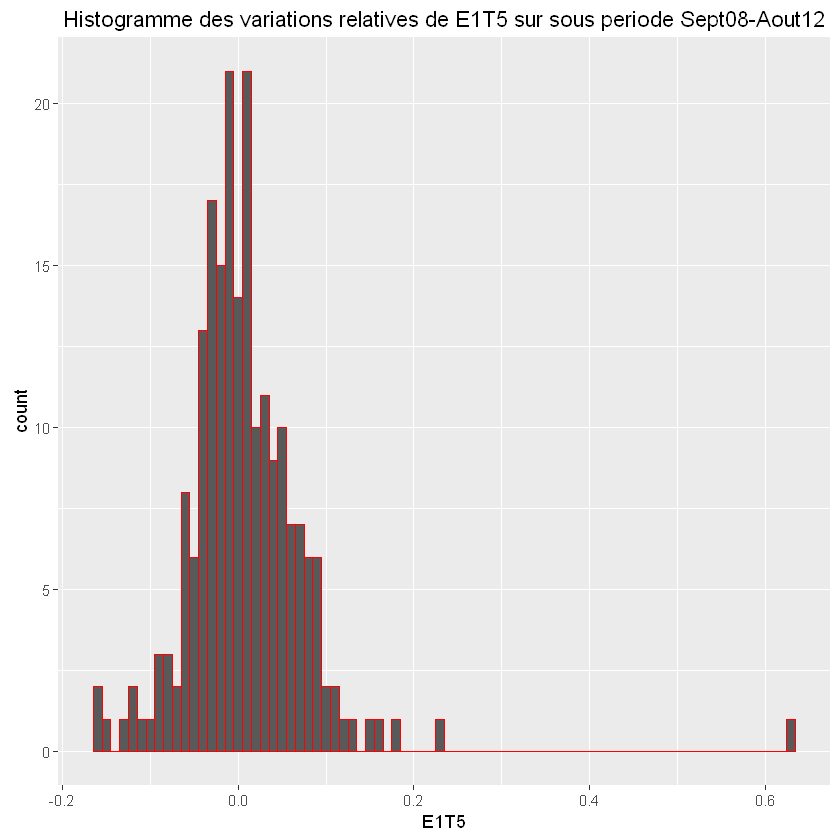

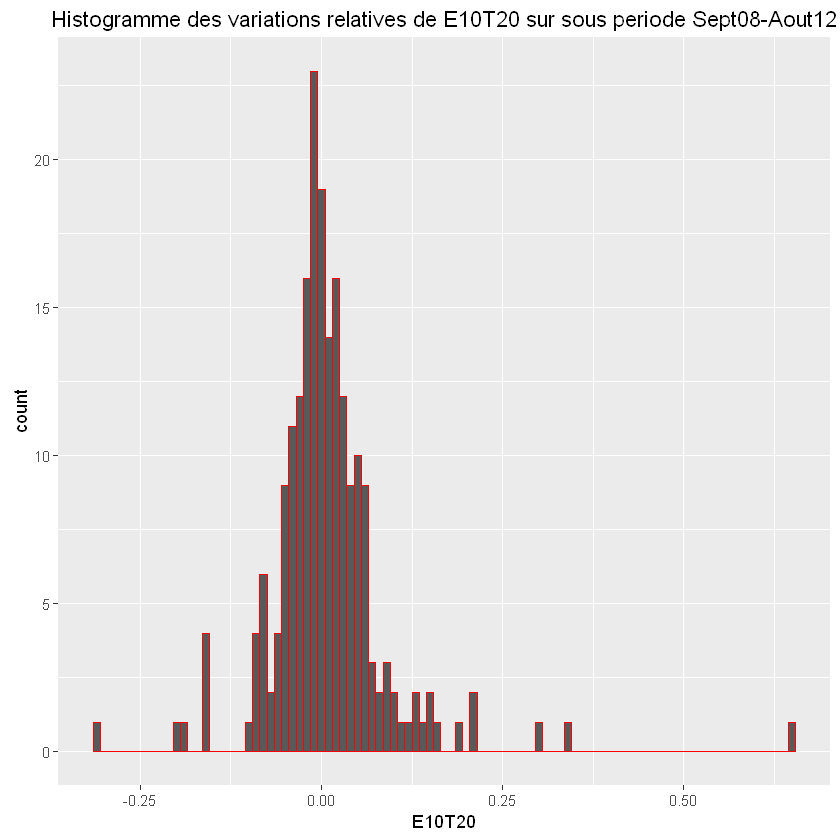

In [64]:
varPart2 = var[350:557,]

ggplot(varPart2, aes(E1T5)) +
geom_histogram(binwidth = 0.01, color="red") +
ggtitle("Histogramme des variations relatives de E1T5 sur sous periode Sept08-Aout12")

ggplot(varPart2, aes(E10T20)) +
geom_histogram(binwidth = 0.01, color="red") +
ggtitle("Histogramme des variations relatives de E10T20 sur sous periode Sept08-Aout12")

In [66]:
E1T5vr1 = analyseTable(varPart2$E1T5)
E1T10vr1 = analyseTable(varPart2$E1T10)
E1T20vr1 = analyseTable(varPart2$E1T20)
E5T5vr1 = analyseTable(varPart2$E5T5)
E5T10vr1 = analyseTable(varPart2$E5T10)
E5T20vr1 = analyseTable(varPart2$E5T20)
E10T5vr1 = analyseTable(varPart2$E10T5)
E10T10vr1 = analyseTable(varPart2$E10T10)
E10T20vr1 = analyseTable(varPart2$E10T20)
tabRecapVarRelativePart1=data.frame(E1T5vr1, E1T10vr1, E1T20vr1, E5T5vr1, E5T10vr1, E5T20vr1, E10T5vr1, E10T10vr1, E10T20vr1, 
                   row.names=c("Valeur_Min", "Valeur_max", "Moyenne", "Variance_Empirique", "Ecart_Type", 
                                "Mediane", "Premier_quartile", "Troisime_quartile", "Quantile_d'ordre_0.25",
                                "Quantile_d'ordre_0.5", "Quantile_d'ordre_0.95", "Quantile_d'ordre_0.99", 
                                "Quantile_d'ordre_0.995"))
tabRecapVarRelativePart1

,E1T5vr1,E1T10vr1,E1T20vr1,E5T5vr1,E5T10vr1,E5T20vr1,E10T5vr1,E10T10vr1,E10T20vr1
Valeur_Min,-0.1637,-0.1563,-0.1854,-0.222,-0.2402,-0.2556,-0.2682,-0.2876,-0.3077
Valeur_max,0.6317,0.465,0.6,0.4399,0.5267,0.6241,0.6024,0.5351,0.6514
Moyenne,0.00771917,0.007085476,0.007609867,0.006026048,0.006322501,0.00711378,0.006347474,0.006906237,0.007666581
Variance_Empirique,0.005205205,0.004280811,0.006004354,0.003399946,0.00409794,0.005620781,0.005068075,0.005155325,0.007184855
Ecart_Type,0.07214711,0.0654279,0.07748776,0.05830905,0.06401515,0.07497187,0.07119041,0.07180059,0.08476353
Mediane,0.001448,0,0.00105,0.004311,0.0009524,0.002146,0.001106,0,0
Premier_quartile,-0.02925,-0.02798,-0.03232,-0.02308,-0.02639,-0.02857,-0.02546,-0.02579,-0.02721
Troisime_quartile,0.03694,0.03266,0.03089,0.02852,0.032,0.03189,0.0278,0.0366,0.03461
Quantile_d'ordre_0.25,-0.02924784,-0.02798073,-0.03232494,-0.02307621,-0.02639283,-0.02856807,-0.02546034,-0.02579164,-0.0272097
Quantile_d'ordre_0.5,0.001447736,0,0.00105042,0.004310659,0.000952381,0.002146439,0.001106195,0,0


### Commentaires

Les médianes sont cette fois-ci légèrement plus haute.  